# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Get the HTML content
html = browser.html

# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')


In [7]:
table = soup.find('table')

# Extract all rows of data
all_rows = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all('td')]
    all_rows.append(row_data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
data_list = []

# Loop through the scraped data to create a list of dictionaries
for row_data in all_rows:
    if len(row_data) == len(column_names):  # Check if the row has the expected number of columns
        data_dict = dict(zip(column_names, row_data))
        data_list.append(data_dict)

df = pd.DataFrame(data_list)

In [15]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(all_rows, columns=column_names)

In [16]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [19]:
# Examine data type of each column
print("Data types before conversion:")
print(df.dtypes)

# Convert 'terrestrial_date' column to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Fill missing values in 'sol' column with 0 (or any other appropriate value)
df['sol'] = df['sol'].fillna(0)  # Replace None with 0

# Convert 'sol' column to integer
df['sol'] = df['sol'].astype(int)

# Convert 'ls' column to float
df['ls'] = df['ls'].astype(float)

# Convert 'min_temp' column to float
df['min_temp'] = df['min_temp'].astype(float)

# Convert 'pressure' column to float
df['pressure'] = df['pressure'].astype(float)

# Examine data type of each column after conversion
print("\nData types after conversion:")
print(df.dtypes)

# Display the DataFrame
print(df)


Data types before conversion:
id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                    object
pressure                    object
dtype: object

Data types after conversion:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object
        id terrestrial_date   sol     ls month  min_temp  pressure
0     None              NaT     0    NaN  None       NaN       NaN
1        2       2012-08-16    10  155.0     6     -75.0     739.0
2       13       2012-08-17    11  156.0     6     -76.0     740.0
3       24       2012-08-18    12  156.0     6     -76.0     741.0
4       35       2012-08-19    13  157.0     6     -74.0     732.0
...    ...          

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of months on Mars:", num_months)

Number of months on Mars: 12


In [21]:
# 2. How many Martian days' worth of data are there?
num_sols = df['sol'].nunique()
print("Number of Martian days' worth of data:", num_sols)

Number of Martian days' worth of data: 1868


In [22]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()
print("Average low temperature by month:")
print(avg_low_temp_by_month)

Average low temperature by month:
month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


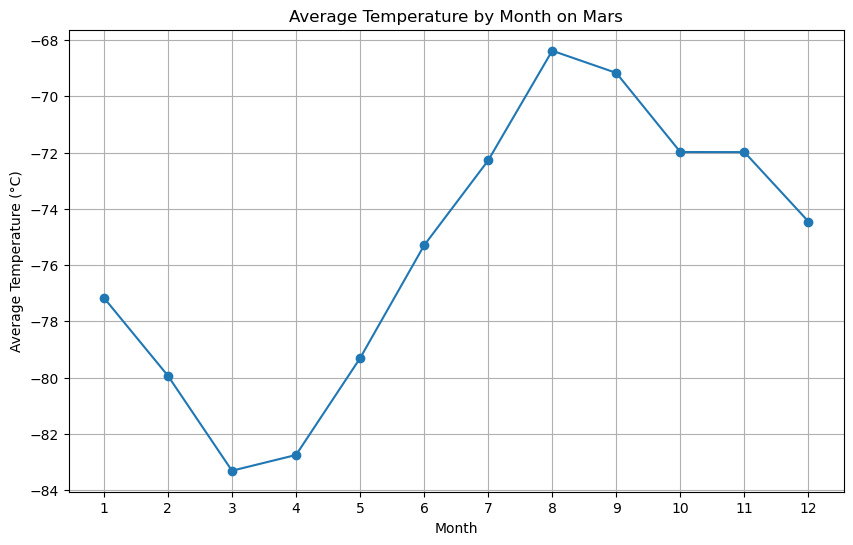

In [26]:
df = df.dropna(subset=['month'])

df['month'] = df['month'].astype(int)

avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
avg_temp_by_month.plot(marker='o', linestyle='-')
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(avg_temp_by_month.index)
plt.grid(True)
plt.show()

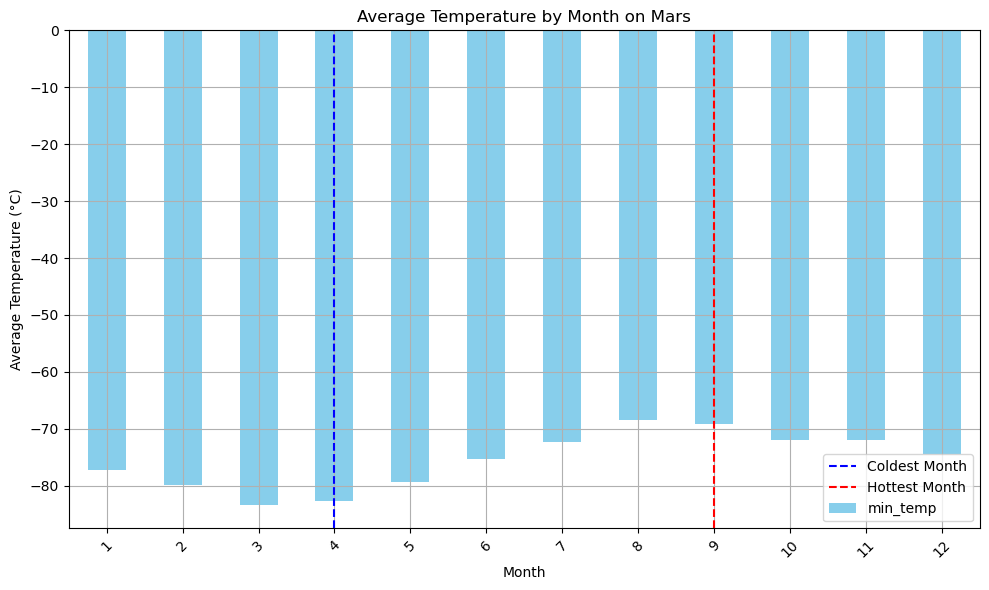

In [27]:
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Identify the coldest and hottest months
coldest_month = avg_temp_by_month.idxmin()
hottest_month = avg_temp_by_month.idxmax()

plt.figure(figsize=(10, 6))
avg_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')

plt.axvline(x=coldest_month, color='blue', linestyle='--', label='Coldest Month')
plt.axvline(x=hottest_month, color='red', linestyle='--', label='Hottest Month')

plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

print("Average pressure by Martian month:")
print(avg_pressure_by_month)

Average pressure by Martian month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


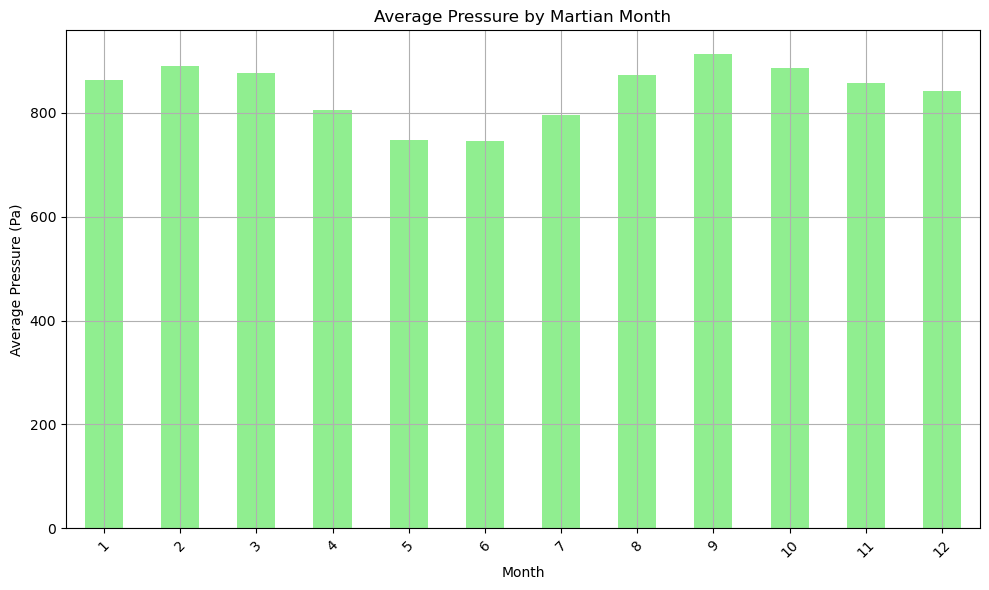

In [29]:
# Plot the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='lightgreen')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


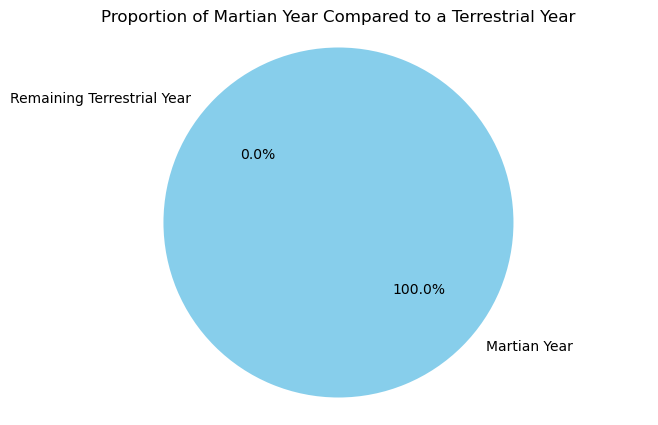

In [32]:
# 5. How many terrestrial (earth) days are there in a Martian year?

labels = ['Martian Year', 'Remaining Terrestrial Year']
sizes = [martian_year_days, earth_year_days - martian_year_days]

sizes = [max(0, size) for size in sizes]

colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Martian Year Compared to a Terrestrial Year')
plt.axis('equal') 
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Create a dictionary containing the data
data = {
    "Statistic": ["Coldest Month", "Warmest Month", "Lowest Atmospheric Pressure Month", "Highest Atmospheric Pressure Month", "Martian Year Duration"],
    "Month": [3, 8, 6, 9, "675 days (from plot)"],
    "Temperature/Pressure": ["Coldest", "Warmest", "Lowest", "Highest", "687 Earth days (Internet search)"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Write the DataFrame to a CSV file
df.to_csv("mars_data.csv", index=False)

print("Data has been written to mars_data.csv")


Data has been written to mars_data.csv


In [34]:
browser.quit()